In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import gaussian_kde

In [2]:
priors_dict = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}


theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(10000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,10000))
print(np.shape(theta))

(160000,)
(16, 10000)


In [3]:
theta2 = pd.read_csv("../sequential_files/tr2_ml.csv")
theta2 = theta2.to_numpy(dtype=np.float32)
np.shape(theta2)
#theta_3 = pd.read_csv("./tr3_jax_big.csv")
#theta_3 = theta_3.to_numpy(dtype=np.float32)
#np.shape(theta_3)
#theta_4 = pd.read_csv("./tr4_jax_big_2.csv")
#theta_4 = theta_4.to_numpy(dtype=np.float32)
#np.shape(theta_4)

(10000, 16)

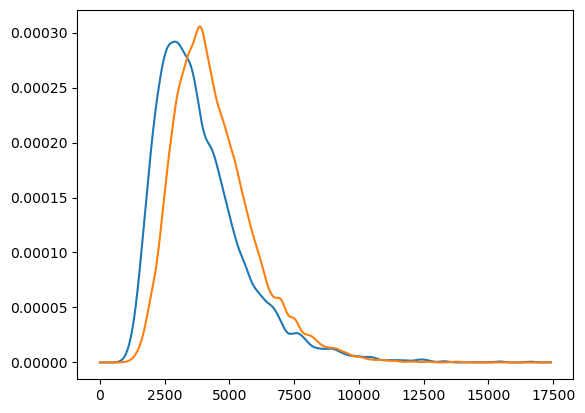

In [15]:
# Perform KDE
kde1 = gaussian_kde(theta[2][0:9999], bw_method=0.1)
kde2 = gaussian_kde(theta2[0:9999,2], bw_method=0.1)
# Generate a smooth range of x-values
x1_values = np.linspace(0, max(theta[2][0:9999]), 1000)
x2_values = np.linspace(0, max(theta[2][0:9999]), 1000)
# Get corresponding y-values for the KDE
y1_values = kde1(x1_values)
y2_values = kde2(x2_values)
# Plot the smooth KDE curve
plt.plot(x1_values, y1_values)
plt.plot(x2_values, y2_values)
# Show the plot
plt.show()

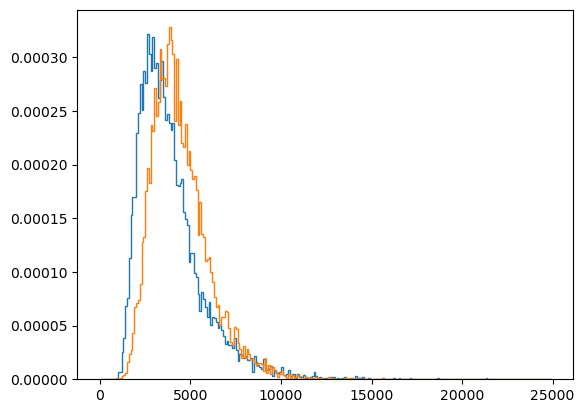

In [12]:
plt.hist(theta[2][0:9999], bins=np.arange(0, 25000, 100), density=True, histtype='step')
plt.hist(theta2[0:9999,2], bins=np.arange(0, 25000, 100), density=True, histtype='step')
plt.show()

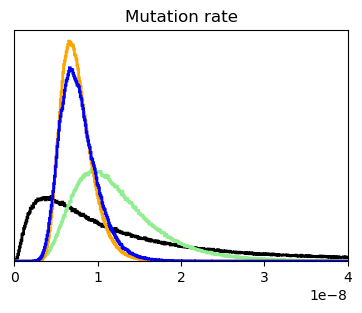

In [45]:
plt.figure(figsize=(4.3,3))
plt.hist(theta[14][0:700000],
         alpha=1,
         label='prior', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='black')

plt.hist(theta_2[0:700000, 14],
         alpha=1,
         label='R1', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='lightgreen')

plt.hist(theta_3[0:1000000, 14],
         alpha=1,
         label='R2', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='orange')

plt.hist(theta_4[0:1000000, 14],
         alpha=1,
         label='R2', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='blue')

#plt.legend(loc='upper right')
#plt.title("m")
plt.title("Mutation rate")
plt.yticks([])
plt.xlim([0, 4e-8])
plt.show()